In [36]:
# Jupyter Notebook Cell 1: Imports and Data Loading

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set default plot style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100  # For higher resolution plots

# Your provided data as a multi-line string
path = "../output/v2/"
input_path = os.path.join(path, "metrics_df.csv")
output_path = path

# Read the data into a pandas DataFrame
df = pd.read_csv(input_path)

print("DataFrame head:")
print(df.head())
print("\nDataFrame info:")
df

DataFrame head:
   epoch  train_loss  val_loss  train_accuracy  val_accuracy  train_f1_macro  \
0      1    6.800172  6.798709        0.001506      0.002510        0.000205   
1      2    6.347411  5.527163        0.108787      0.282631        0.068674   
2      3    4.117738  2.760450        0.361674      0.600402        0.261544   
3      4    1.721423  1.201105        0.718494      0.806225        0.655859   
4      5    0.627751  0.741013        0.886192      0.865462        0.867845   

   train_precision_macro  train_recall_macro  train_f1_weighted  \
0               0.000113            0.001530           0.000203   
1               0.113301            0.078718           0.090121   
2               0.347852            0.281829           0.310680   
3               0.717381            0.656582           0.695572   
4               0.887453            0.866262           0.882565   

   train_precision_weighted  train_recall_weighted  val_f1_macro  \
0                  0.000114     

,epoch,train_loss,val_loss,train_accuracy,val_accuracy,train_f1_macro,train_precision_macro,train_recall_macro,train_f1_weighted,train_precision_weighted,train_recall_weighted,val_f1_macro,val_precision_macro,val_recall_macro,val_f1_weighted,val_precision_weighted,val_recall_weighted
0,1,6.800172,6.798709,0.001506,0.002510,0.000205,0.000113,0.001530,0.000203,0.000114,0.001506,0.000307,0.000172,0.002506,0.000263,0.000147,0.002510
1,2,6.347411,5.527163,0.108787,0.282631,0.068674,0.113301,0.078718,0.090121,0.144884,0.108787,0.165792,0.184417,0.208797,0.221358,0.251263,0.282631
2,3,4.117738,2.760450,0.361674,0.600402,0.261544,0.347852,0.281829,0.310680,0.378975,0.361674,0.465672,0.472779,0.514569,0.533266,0.545485,0.600402
3,4,1.721423,1.201105,0.718494,0.806225,0.655859,0.717381,0.656582,0.695572,0.722560,0.718494,0.760947,0.766092,0.793523,0.778410,0.792812,0.806225
4,5,0.627751,0.741013,0.886192,0.865462,0.867845,0.887453,0.866262,0.882565,0.892446,0.886192,0.838359,0.848262,0.862565,0.852154,0.877653,0.865462
5,6,0.296431,0.653871,0.938745,0.875000,0.933982,0.941266,0.933641,0.938197,0.942763,0.938745,0.847725,0.855255,0.867854,0.859160,0.874374,0.875000
6,7,0.139194,0.599299,0.972218,0.889558,0.970372,0.974016,0.969392,0.972062,0.973893,0.972218,0.871854,0.881640,0.886971,0.881058,0.899067,0.889558
7,8,0.073669,0.570005,0.986444,0.895582,0.986199,0.988119,0.985981,0.986273,0.987282,0.986444,0.878179,0.884134,0.899035,0.885871,0.903263,0.895582
8,9,0.054546,0.557707,0.989623,0.907631,0.988700,0.990229,0.988414,0.989547,0.990329,0.989623,0.888608,0.892947,0.905252,0.897951,0.911304,0.907631
9,10,0.038595,0.531176,0.992134,0.910643,0.991465,0.992864,0.991050,0.991998,0.992544,0.992134,0.896003,0.903044,0.910913,0.902969,0.918725,0.910643


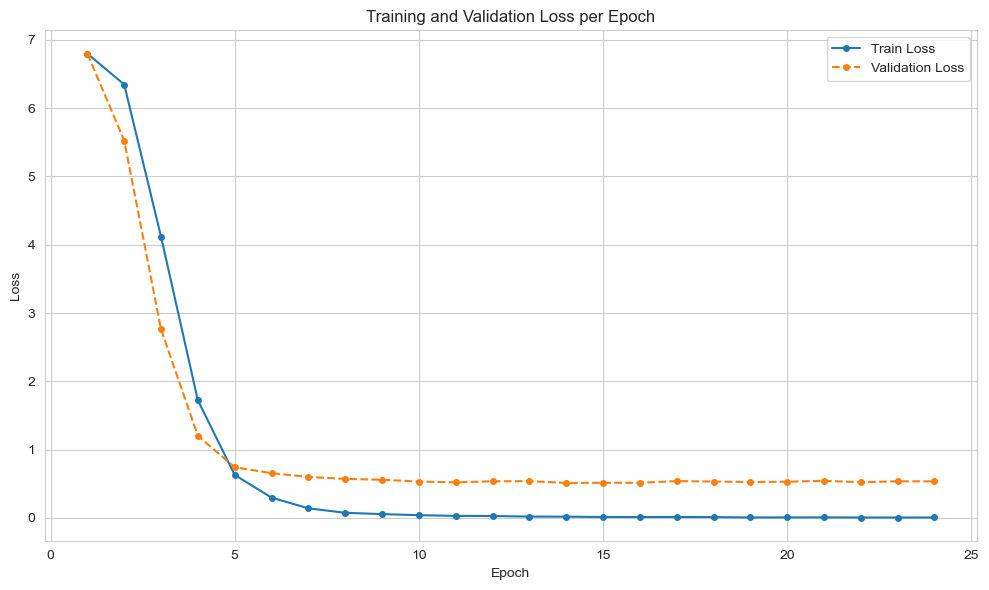

In [37]:
import os

# Jupyter Notebook Cell 2: Loss Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'loss_curve.png'))  # Save as PNG
plt.show()

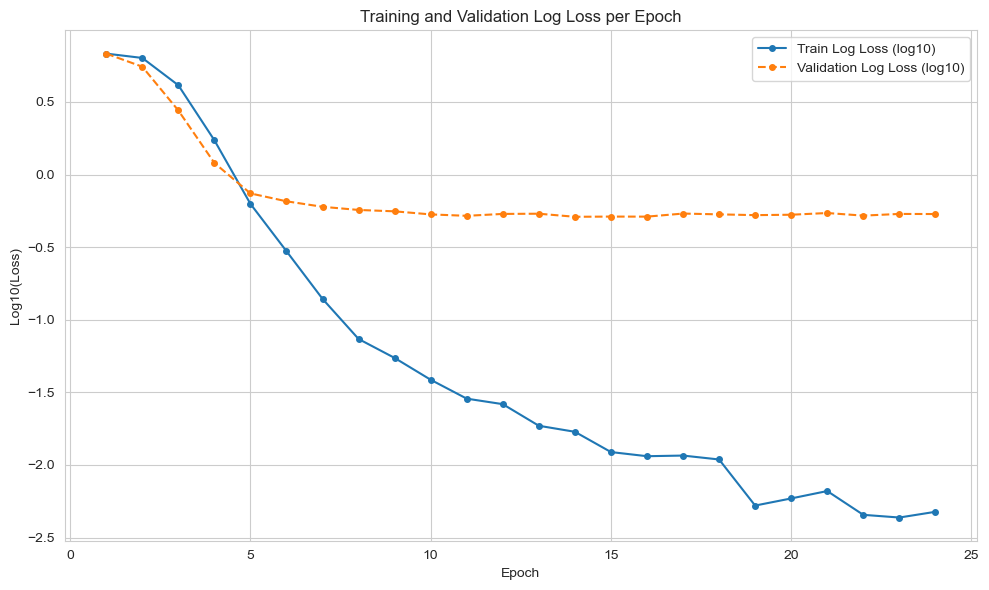

In [38]:
# Jupyter Notebook Cell 3: Log Loss Curve Plot

# Apply log10 to the loss values. Add a small epsilon to avoid log(0) issues if loss hits zero.
epsilon = 1e-9
df['train_log_loss'] = np.log10(df['train_loss'] + epsilon)
df['val_log_loss'] = np.log10(df['val_loss'] + epsilon)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_log_loss'], label='Train Log Loss (log10)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_log_loss'], label='Validation Log Loss (log10)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Log Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Log10(Loss)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'log_loss_curve.png'))  # Save as PNG
plt.show()

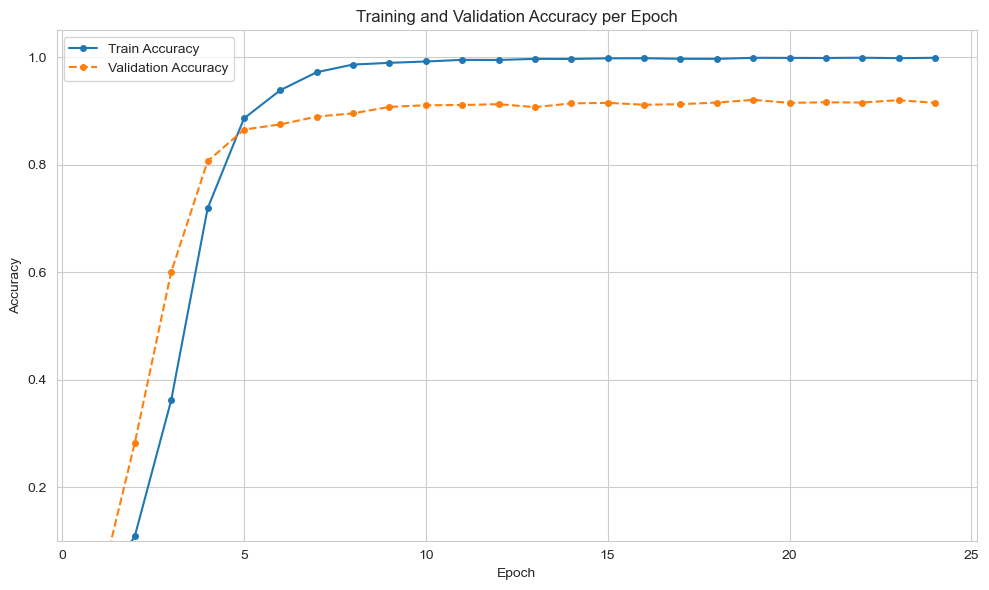

In [39]:
# Jupyter Notebook Cell 4: Accuracy Curve Plot

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_accuracy'], label='Train Accuracy', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(.1, 1.05)  # Accuracy typically ranges from 0 to 1
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'accuracy_curve.png'))
plt.show()

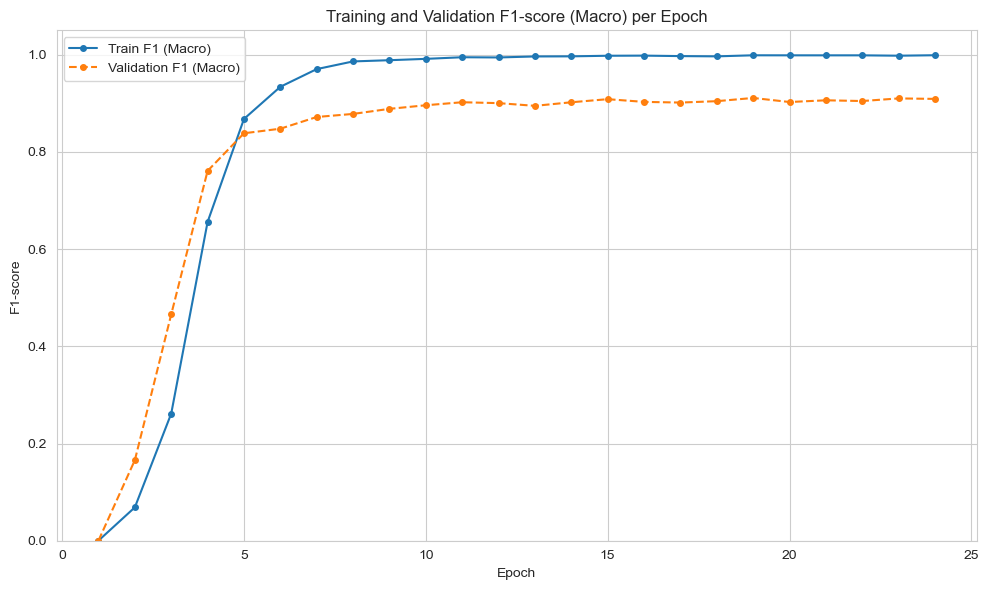

In [45]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics
plt.figure(figsize=(10, 6))

plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'f1_score_macro_curve.png'))
plt.show()

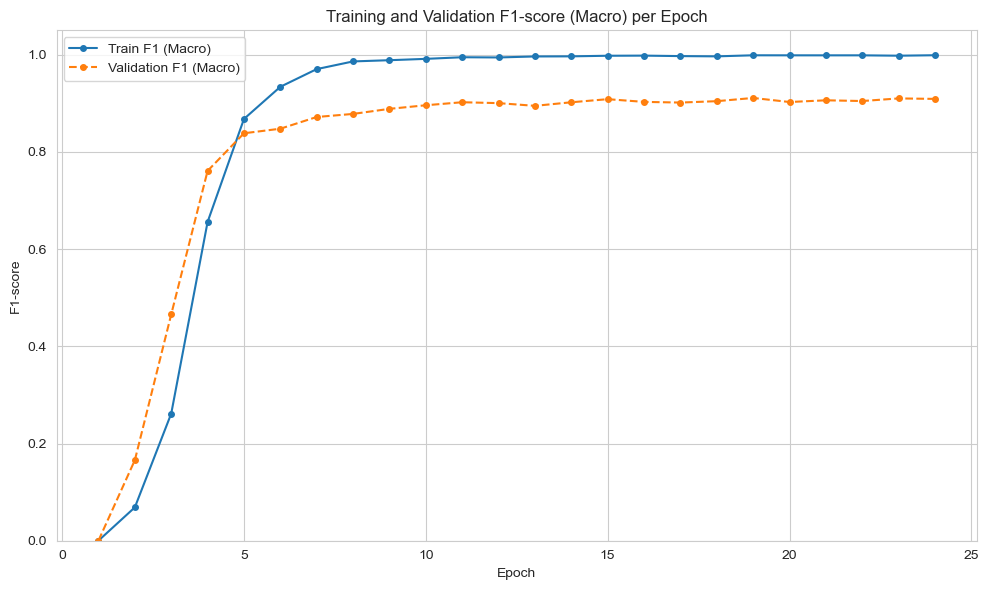

In [41]:
# Jupyter Notebook Cell 5: Placeholder for F1-score and other metrics

# IMPORTANT:
# Your provided data string does *not* contain F1-score or other detailed metrics.
# To plot F1-score, you must:
# 1. Ensure your `calculate_metrics` function in your training script *actually computes and returns* F1-score.
#    (e.g., metrics['f1_macro'] = f1_score(true_labels, predictions, average='macro'))
# 2. Append these F1-scores to dedicated lists in your main training loop
#    (e.g., `train_f1_scores = []`, `val_f1_scores = []`).
# 3. Save these lists to your `metrics_df` DataFrame using `df['train_f1'] = train_f1_scores`, etc.
# 4. Then, you can either:
#    a) Load the saved `metrics_df.csv` (see Cell 6)
#    b) Re-run your training script to generate the full data in the notebook if you integrate everything here.

# For now, let's create dummy F1-score data to demonstrate the plotting
# Replace this with your actual loaded/computed F1 scores once available
# Assuming F1 scores are similar to accuracy for this example

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_f1_macro'], label='Train F1 (Macro)', marker='o', markersize=4, linestyle='-')
plt.plot(df['epoch'], df['val_f1_macro'], label='Validation F1 (Macro)', marker='o', markersize=4, linestyle='--')
plt.title('Training and Validation F1-score (Macro) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [42]:
# Jupyter Notebook Cell 6: Example of Loading from CSV (if you save your DataFrame)

# Assuming you've run your training script and saved the metrics_df to a CSV:
# metrics_df.to_csv(os.path.join(output_path, 'metrics_df.csv'), index=False)

# To load it later in a new notebook session:
# import pandas as pd
# import os # You might need this if your path is relative

# file_path = 'path/to/your/output_folder/metrics_df.csv' # Replace with your actual path
# if os.path.exists(file_path):
#     loaded_df = pd.read_csv(file_path)
#     print("Loaded DataFrame head:")
#     print(loaded_df.head())
#     # You can then use loaded_df for all the plotting cells above
# else:
#     print(f"File not found at: {file_path}. Make sure to run your training script first.")